# Simple Trajectory Dev [Part 2]

- Stephen Welch 
- Welch Labs
- September 1, 2017

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
tu = 5.0 #Ramp-up time
tt = 30.0 #Total Time
td = tt - tu #Ramp-down time

p1 = 100 #ticks
p2 = 1000 #ticks

Hmmm - another option here, of course, would be a spline.

In [50]:
a = (p1-p2)/(2*(tu**2-tu*tt))
e = -1*a
c = 2*a*tu
b = p1
f = p2
d = (p1+p2-c*tt)/2

In [51]:
def compute(t):
    if t < tu:
        return a*t**2+b
    
    elif t>=tu and t<=td:
        return c*t+d 
        
    elif t > td:
        return e*(tt-t)**2+f
        

In [52]:
times = np.linspace(0, tt, 100)
trajectory = []

for time in times:
    trajectory.append(compute(time))

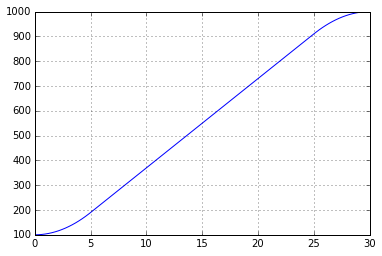

In [53]:
plot(times, trajectory)
grid(1)

# FUCK Yeah. #Calculus #HardThanIThought #AmIActuallyBadATTheMath?

In [68]:
class SimpleQuadraticTrajectory(object):
    '''
    Simple quadratic trajectory planner. (should) achieve smooth starts and stops 
    by using quadratic function at the ends, and matchign first dericatives. 
    '''
    
    def __init__(self, tu, tt, p1, p2):
        
        self.tu = float(tu) #Ramp-up time
        self.tt = float(tt) #Total Time
        self.td = tt - tu # Ramp-down time, presently I've only implement this when the time to 
                          # ramp up equals the time to ramp down!

        self.p1 = float(p1) # starting position, ticks
        self.p2 = float(p2) # ending position, ticks
        
        #Compute linear and quadratic coefficients!
        self.a = (self.p1-self.p2)/(2*(self.tu**2-self.tu*self.tt))
        self.e = -1*self.a
        self.c = 2*self.a*self.tu
        self.b = self.p1
        self.f = self.p2
        self.d = (self.p1+self.p2-self.c*self.tt)/2
        
    def compute(self, t):
        if t < self.tu:
            return self.a*t**2+self.b

        elif t>=self.tu and t<=self.td:
            return self.c*t+self.d 

        elif t > self.td:
            return self.e*(self.tt-t)**2+self.f
    
    def visualize(self):
        times = np.linspace(0, self.tt, 100)
        trajectory = []

        for tim in times:
            trajectory.append(self.compute(tim))
            
        plt.plot(times, trajectory)
        plt.grid(1)   

In [69]:
SQT = SimpleQuadraticTrajectory(tu = 5, tt = 30, p1 = 100, p2 = 1000)

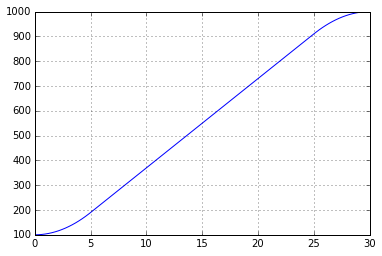

In [70]:
SQT.visualize()